# Zomato Data Analysis

Exploratory data analysis on Zomato restaurant data to uncover trends in pricing, ratings, locations, and customer preferences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

## Data Loading

In [2]:
df = pd.read_csv("zomato.csv")
print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
print("Columns:", df.columns.tolist())
print("\nData Info:")
display(df.info())

Columns: ['address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuis

None

## Data Inspection & Quality Check

Understanding the structure, columns, and basic quality issues in the dataset.

In [4]:
print("DATA QUALITY REPORT")
print(f"Total Records: {len(df)}")
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nData Types:")
df.dtypes

DATA QUALITY REPORT
Total Records: 56252

Missing Values:
address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

Data Types:


address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                          object
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
dtype: object

## Data Cleaning

Filtering invalid values, handling missing data, and preparing the dataset for analysis.

In [5]:
## Data Cleaning

# Filter for valid online_order & book_table values
df_cleaned = df[df['online_order'].isin(['Yes','No']) & df['book_table'].isin(['Yes','No'])].copy()
print(f"After filtering invalid boolean columns: {len(df_cleaned)} records")

# Clean and convert rate (remove '/5', replace NEW/- with 0, to numeric)
df_cleaned['rate'] = df_cleaned['rate'].str.replace('/5','',regex=False).replace(['NEW','-'],'').pipe(pd.to_numeric, errors='coerce')
print(f"Rate cleaned → min: {df_cleaned['rate'].min()} | max: {df_cleaned['rate'].max()}")

# Clean cost (remove commas, convert to numeric)
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',','',regex=False).pipe(pd.to_numeric, errors='coerce')
print(f"Cost cleaned → min: ₹{df_cleaned['approx_cost(for two people)'].min()} | max: ₹{df_cleaned['approx_cost(for two people)'].max()}")

After filtering invalid boolean columns: 51717 records
Rate cleaned → min: 1.8 | max: 4.9
Cost cleaned → min: ₹40.0 | max: ₹6000.0


In [6]:
df_cleaned.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                 4361
dtype: int64

In [7]:
# Fill missing ratings with median value
df_cleaned['rate'] = df_cleaned['rate'].fillna(df_cleaned['rate'].median())

# Fill missing phone numbers with placeholder "Not Available"
df_cleaned['phone'] = df_cleaned['phone'].fillna("Not Available")

# Fill missing locations with placeholder "Not Available"
df_cleaned['location'] = df_cleaned['location'].fillna("Not Available")

# Fill missing rest types with the most frequent type
df_cleaned['rest_type'] = df_cleaned['rest_type'].fillna(df_cleaned['rest_type'].mode()[0])

# Replace missing dish_liked with placeholder text
df_cleaned['dish_liked'] = df_cleaned['dish_liked'].fillna("No dish liked mentioned")

# Replace missing cuisines with "Unknown"
df_cleaned['cuisines'] = df_cleaned['cuisines'].fillna("Unknown")

# Fill missing cost with the median cost value
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].fillna(
    df_cleaned['approx_cost(for two people)'].median()
)

# Fill missing service/type category with the most common
df_cleaned['listed_in(type)'] = df_cleaned['listed_in(type)'].fillna(
    df_cleaned['listed_in(type)'].mode()[0]
)

# Print final dataset size and remaining missing values
print(f"Total Records: {len(df_cleaned)}")
print("Missing Values Remaining:")
print(df_cleaned.isnull().sum())

Total Records: 51717
Missing Values Remaining:
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [8]:
# df_cleaned.info()

In [9]:
print("Data Cleaned Sucessfuly!")
df_cleaned.sample(3)

Data Cleaned Sucessfuly!


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
24834,"4th Floor, Food Court, Bangalore Central, 9th ...",Juice Buzz,No,No,3.1,10,+91 9343508182,JP Nagar,Beverage Shop,No dish liked mentioned,Juices,200.0,Dine-out
4985,"Shop 1, Outer Ring Road, Near Challakere Lake,...",Shree K Foods,No,No,3.7,0,+91 7795160488,Bellandur,Quick Bites,No dish liked mentioned,"North Indian, South Indian",350.0,Dine-out
48533,"26, ESI Hospital Road, HAL 2nd Stage, 100 Feet...",Infinitea Tea Room & Tea Store,Yes,Yes,4.3,771,+91 9740195375\r\n080 41514100,Indiranagar,"Casual Dining, Cafe","Coffee, Momos, Sandwich, Tiramisu, Nachos, Kiw...","Continental, Cafe, Desserts, Salad, Momos",1000.0,Delivery


In [10]:
# Display a summary of the dataset
display(df_cleaned.describe(include='all'))

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,51717,51717,51717,51717,51717.000000,51717,51717,51717,51717,51717,51717,51717.000000,51717
unique,11495,8792,2,2,NaN,2328,12904,94,93,5272,2724,NaN,7
top,Delivery Only,Cafe Coffee Day,Yes,No,NaN,0,Not Available,BTM,Quick Bites,No dish liked mentioned,North Indian,NaN,Delivery
freq,128,96,30444,45268,NaN,10027,1208,5124,19359,28078,2913,NaN,28672
mean,NaN,NaN,NaN,NaN,3.700362,NaN,NaN,NaN,NaN,NaN,NaN,554.391689,NaN
std,NaN,NaN,NaN,NaN,0.395391,NaN,NaN,NaN,NaN,NaN,NaN,437.563723,NaN
min,NaN,NaN,NaN,NaN,1.800000,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN
25%,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,NaN
50%,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,400.000000,NaN
75%,NaN,NaN,NaN,NaN,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,650.000000,NaN


## Exploratory Data Analysis (EDA)

Analyzing ratings, pricing categories, locations, and cuisine popularity.

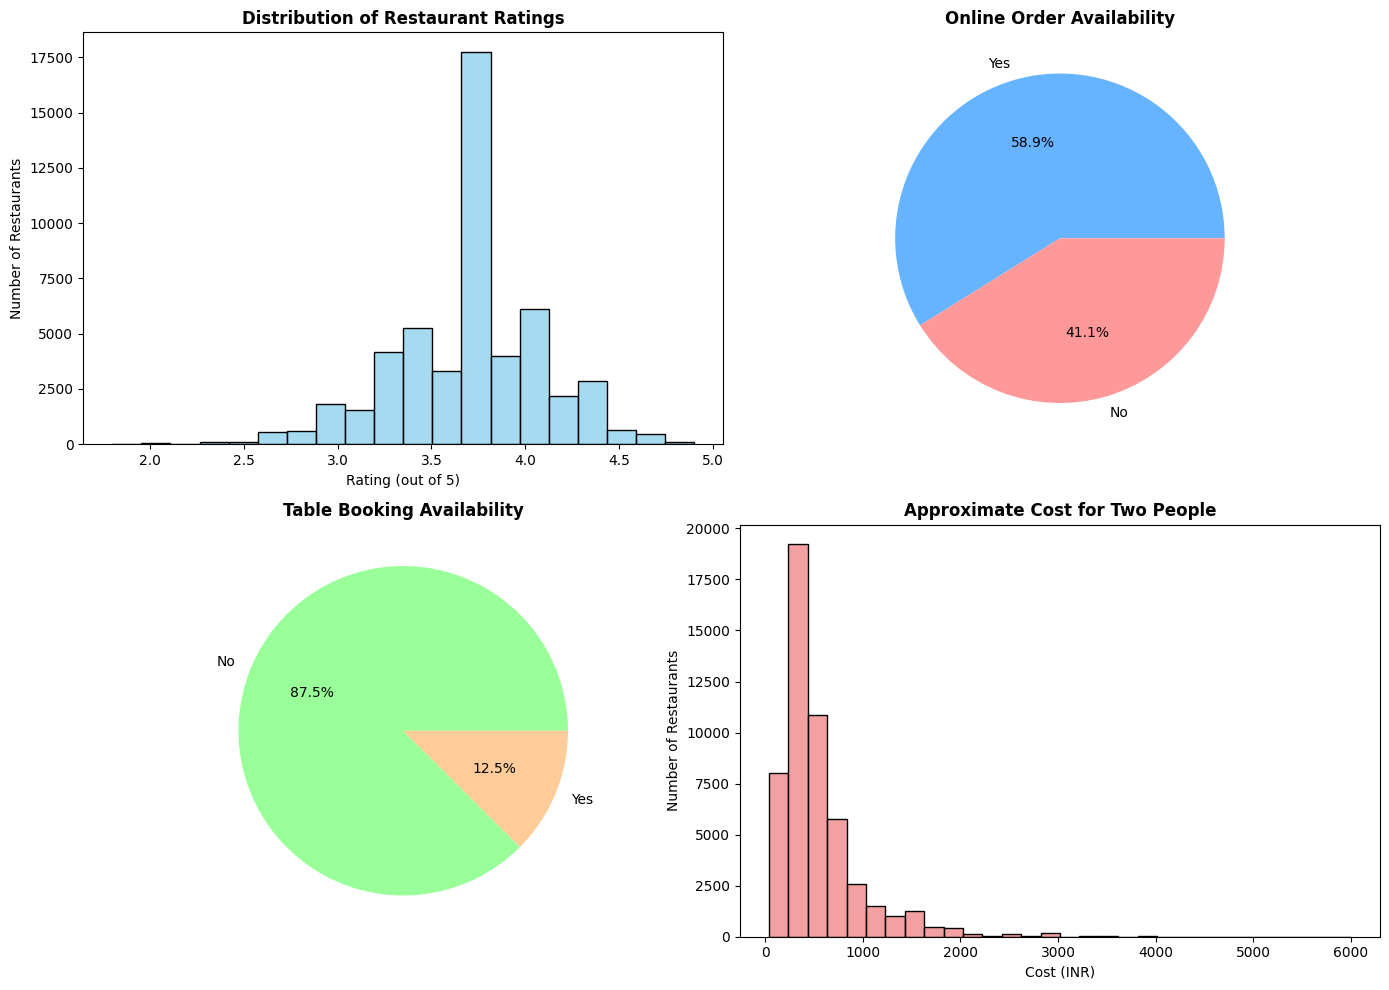

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Ratings
sns.histplot(df_cleaned['rate'], bins=20, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Restaurant Ratings', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Rating (out of 5)')
axes[0, 0].set_ylabel('Number of Restaurants')

# Online Order Availability
online_counts = df_cleaned['online_order'].value_counts()
axes[0, 1].pie(online_counts.values, labels=online_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
axes[0, 1].set_title('Online Order Availability', fontsize=12, fontweight='bold')

# Table Booking Availability
booking_counts = df_cleaned['book_table'].value_counts()
axes[1, 0].pie(booking_counts.values, labels=booking_counts.index, autopct='%1.1f%%', colors=['#99ff99', '#ffcc99'])
axes[1, 0].set_title('Table Booking Availability', fontsize=12, fontweight='bold')

# Cost Distribution
sns.histplot(df_cleaned['approx_cost(for two people)'], bins=30, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Approximate Cost for Two People', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Cost (INR)')
axes[1, 1].set_ylabel('Number of Restaurants')

plt.tight_layout()

In [12]:
# Helper function to extract most common comma-separated terms
def get_most_common_terms(series, top_n=20):
    terms_list = []
    for value in series.dropna():
        terms = [term.strip() for term in str(value).split(',')]
        terms_list.extend(terms)
    return Counter(terms_list).most_common(top_n)

# Get top cuisines
top_cuisines = get_most_common_terms(df_cleaned['cuisines'], top_n=15)
cuisine_names = [c[0] for c in top_cuisines]
cuisine_counts = [c[1] for c in top_cuisines]

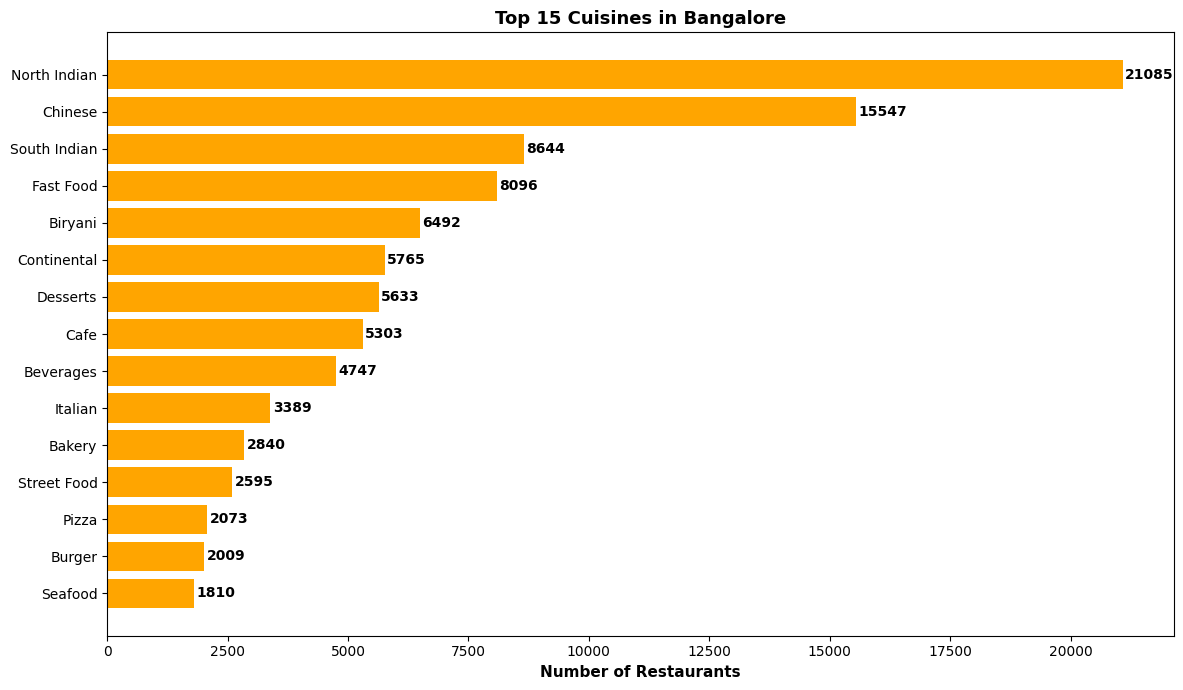

In [13]:
# Plot: Top Cuisines
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(range(len(cuisine_names)), cuisine_counts, color='orange')
ax.set_yticks(range(len(cuisine_names)))
ax.set_yticklabels(cuisine_names)

ax.set_xlabel('Number of Restaurants', fontsize=11, fontweight='bold')
ax.set_title('Top 15 Cuisines in Bangalore', fontsize=13, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for i, v in enumerate(cuisine_counts):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

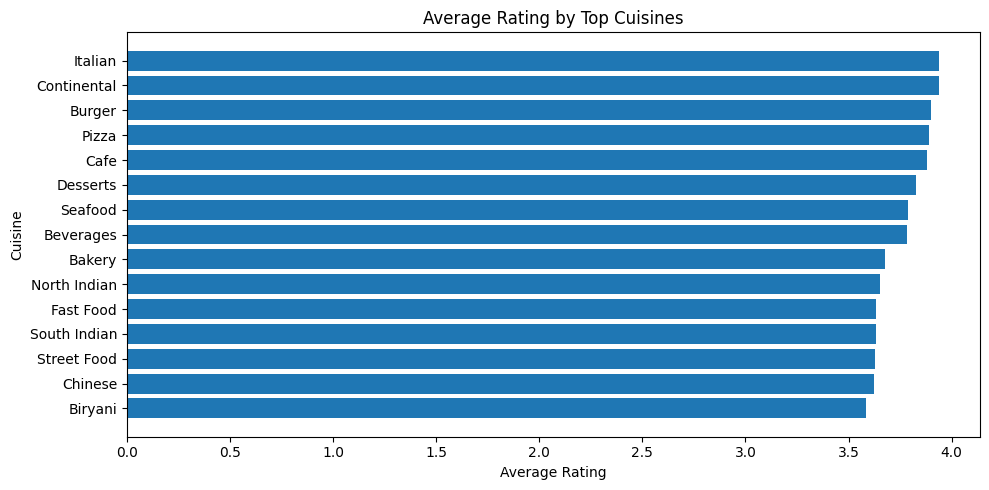

In [14]:
# Calculate average rating for each top cuisine
avg_cuisine_rating = []

for cuisine in cuisine_names:
    avg_rating = df_cleaned[df_cleaned['cuisines'].str.contains(cuisine, na=False)]['rate'].mean()
    avg_cuisine_rating.append(avg_rating)

# Create Series for easy plotting
cuisine_rating_series = pd.Series(avg_cuisine_rating, index=cuisine_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))

plt.barh(
    cuisine_rating_series.index,
    cuisine_rating_series.values
)

plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Average Rating by Top Cuisines")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

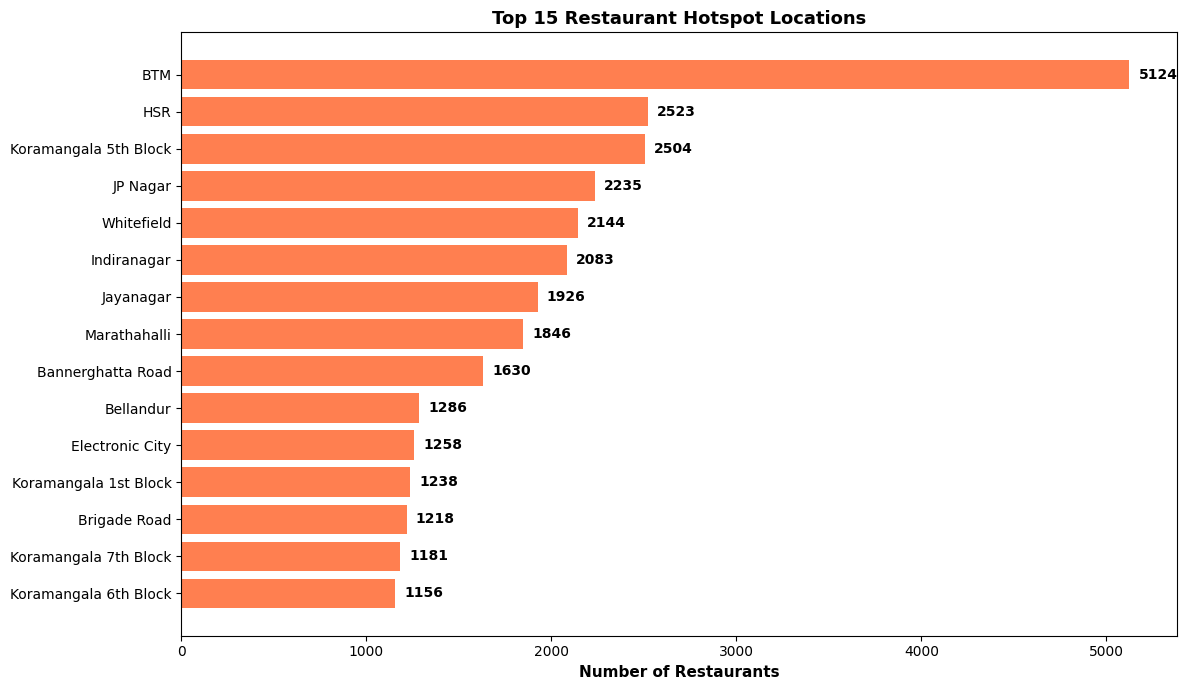

In [15]:
top_locations = df_cleaned['location'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(range(len(top_locations)), top_locations.values, color='coral')
ax.set_yticks(range(len(top_locations)))
ax.set_yticklabels(top_locations.index)
ax.set_xlabel('Number of Restaurants', fontsize=11, fontweight='bold')
ax.set_title('Top 15 Restaurant Hotspot Locations', fontsize=13, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for i, v in enumerate(top_locations.values):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [16]:
# Create price categories based on cost for two
df_cleaned['price_category'] = pd.cut(
    df_cleaned['approx_cost(for two people)'],
    bins=[0, 300, 800, 1500, 10000],
    labels=[
        'Budget (Rs: 0–300)',
        'Mid-range (Rs: 300–800)',
        'Premium (Rs: 800–1500)',
        'Luxury (Rs: 1500+)'
    ],
    include_lowest=True
)

# Quick check
print(df_cleaned['price_category'].value_counts())

price_category
Mid-range (Rs: 300–800)    25318
Budget (Rs: 0–300)         18554
Premium (Rs: 800–1500)      6066
Luxury (Rs: 1500+)          1779
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

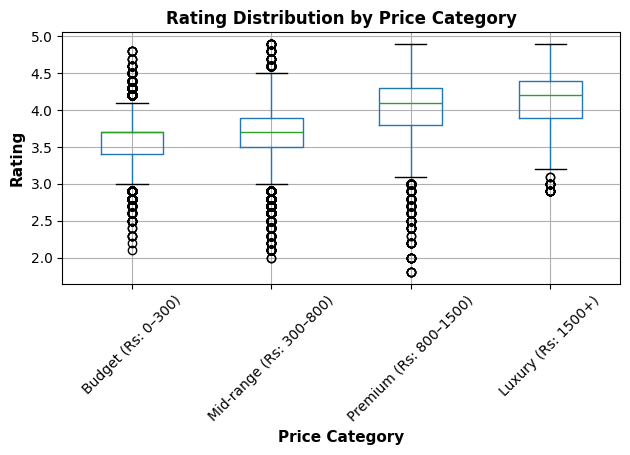

In [17]:
# Box plot showing rating distribution across price categories
plt.figure(figsize=(8, 5))

df_cleaned.boxplot(column='rate', by='price_category')

plt.xlabel('Price Category', fontsize=11, fontweight='bold')
plt.ylabel('Rating', fontsize=11, fontweight='bold')
plt.title('Rating Distribution by Price Category', fontsize=12, fontweight='bold')
plt.suptitle("")  # remove automatic pandas title
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

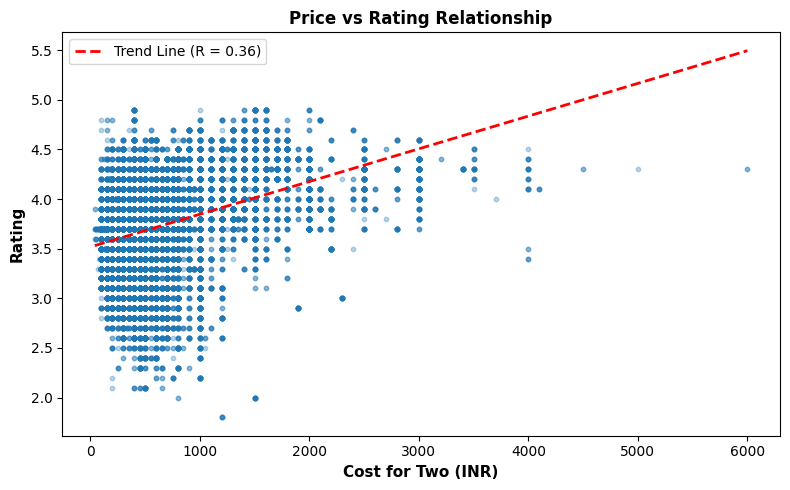

In [18]:
# Scatter plot showing relationship between price and rating
plt.figure(figsize=(8, 5))

plt.scatter(df_cleaned['approx_cost(for two people)'], df_cleaned['rate'], alpha=0.3, s=10)

# Add trend line
z = np.polyfit(df_cleaned['approx_cost(for two people)'], df_cleaned['rate'], 1)
p = np.poly1d(z)

x_trend = np.linspace(df_cleaned['approx_cost(for two people)'].min(), df_cleaned['approx_cost(for two people)'].max(), 100)
corr = df_cleaned['approx_cost(for two people)'].corr(df_cleaned['rate'])

plt.plot(x_trend, p(x_trend), 'r--', linewidth=2, label=f'Trend Line (R = {corr:.2f})')

plt.xlabel('Cost for Two (INR)', fontsize=11, fontweight='bold')
plt.ylabel('Rating', fontsize=11, fontweight='bold')
plt.title('Price vs Rating Relationship', fontsize=12, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

## Cuisine & Dish Analysis

Text-based analysis to identify popular cuisines and dishes.

In [19]:
print("=== PRICE CATEGORY ANALYSIS ===")
price_analysis = df_cleaned.groupby('price_category', observed=True)['rate'].agg(['count', 'mean', 'std'])

print(price_analysis)

# Correlation between price and rating
correlation = df_cleaned['approx_cost(for two people)'].corr(df_cleaned['rate'])
print(f"\nCorrelation between Price and Rating: {correlation:.3f}")

=== PRICE CATEGORY ANALYSIS ===
                         count      mean       std
price_category                                    
Budget (Rs: 0–300)       18554  3.609885  0.294070
Mid-range (Rs: 300–800)  25318  3.664381  0.401409
Premium (Rs: 800–1500)    6066  3.995252  0.431486
Luxury (Rs: 1500+)        1779  4.150534  0.334875

Correlation between Price and Rating: 0.365


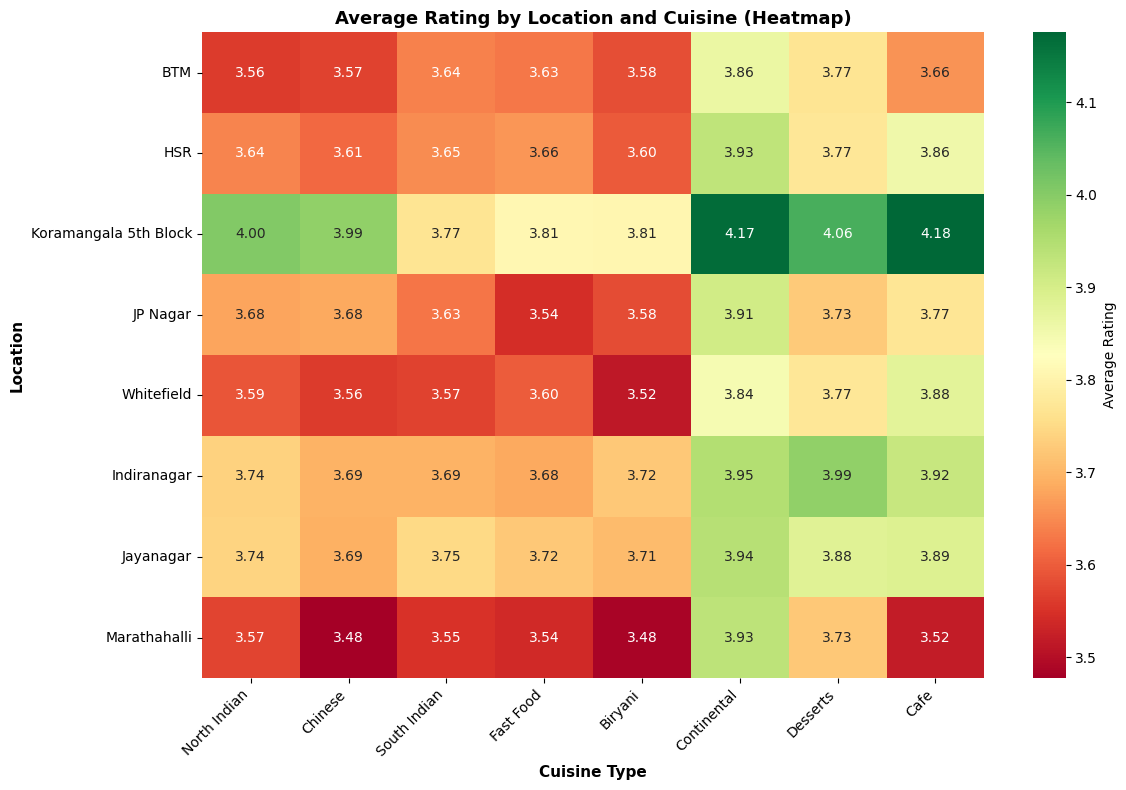

In [20]:
# Create a pivot table for top locations and cuisines
top_locs = df_cleaned['location'].value_counts().head(8).index
top_cuis = [c[0] for c in get_most_common_terms(df_cleaned['cuisines'], top_n=8)]

# Create a matrix of average ratings
heatmap_data = np.zeros((len(top_locs), len(top_cuis)))
for i, loc in enumerate(top_locs):
    for j, cuisine in enumerate(top_cuis):
        mask = (df_cleaned['location'] == loc) & (df_cleaned['cuisines'].str.contains(cuisine, na=False))
        if mask.sum() > 0:
            heatmap_data[i, j] = df_cleaned[mask]['rate'].mean()
        else:
            heatmap_data[i, j] = np.nan

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            xticklabels=top_cuis, yticklabels=top_locs, cbar_kws={'label': 'Average Rating'}, ax=ax)
ax.set_title('Average Rating by Location and Cuisine (Heatmap)', fontsize=13, fontweight='bold')
ax.set_xlabel('Cuisine Type', fontsize=11, fontweight='bold')
ax.set_ylabel('Location', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

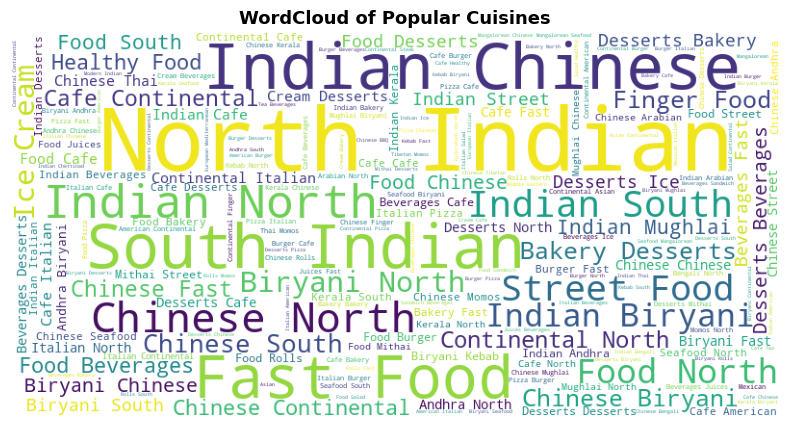

In [21]:
# Combine all cuisines into one text
cuisine_text = " ".join(df_cleaned['cuisines'])

wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(cuisine_text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud of Popular Cuisines", fontsize=13, fontweight='bold')
plt.show()

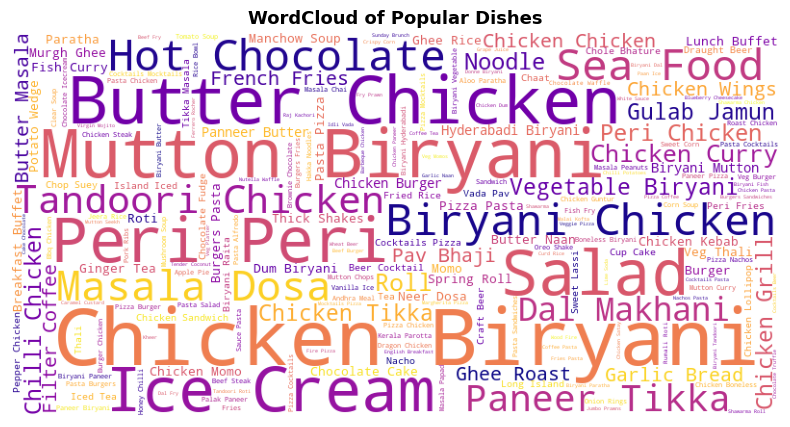

In [22]:
# Remove unwanted placeholder values
dish_series = df_cleaned['dish_liked'].dropna()
dish_series = dish_series[~dish_series.str.contains('liked mentioned|dish liked', case=False, regex=True)]

# Combine remaining text
dish_text = " ".join(dish_series)

# Generate wordcloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'
).generate(dish_text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud of Popular Dishes", fontsize=13, fontweight='bold')
plt.show()

## Conclusion

This project analyzed restaurant and review data to understand key factors influencing ratings.  
The analysis shows that higher-priced restaurants generally receive better ratings compared to budget options.  

Cuisine type plays an important role, with Continental, Italian, and Dessert-based restaurants showing higher average ratings.  
Location analysis highlights areas like BTM, HSR, and Koramangala as major restaurant hotspots with high competition.  

Overall, combining insights from pricing, cuisine preferences, and location data can help food platforms improve recommendations, partnerships, and user experience.

## Business Recommendations

Key insights and recommendations derived from the analysis.

In [23]:
# 5 Simple Recommendations

# 1. Partner with Best Restaurants
# Work with top-rated restaurants (4.0+ rating)
# Give them special features like featured placement and analytics
# They get more customers, you get more orders

# 2. Run Food-Focused Campaigns
# Biryani lovers campaign (6,500 biryani restaurants)
# South Indian breakfast campaign (likely morning rush time)
# Specialty food campaigns work better than generic ads

# 3. Help Restaurants Go Digital
# Many restaurants (41.1%) don't have online ordering
# Offer them a simple menu + ordering system
# They get orders, you get commission

# 4. Smarter Search Results
# Don't just show restaurants by rating (too many are 3.5-4.0)
# Show based on: What user likes + Location + Price + Features + Suggession
# This increases orders because users find better matches

# 5. Sell Data Insights
# Restaurant owners want to know: "How am I doing vs. similar restaurants?"
# Investors want market reports
# Sell them dashboards and reports keeping user privacy

In [24]:
# | What              | Why                                                                |
# | ----------------- | ------------------------------------------------------------------ |
# | Partnership tiers | Not all restaurants are equal; premium ones need premium treatment |
# | Food campaigns    | South Indian & Biryani rate higher than North Indian; use this     |
# | Digital help      | 41.1% restaurants missing online ordering = huge opportunity       |
# | Better search     | Ratings alone don't help; need smart matching                      |
# | Sell data         | You have unique restaurant data; restaurants & investors will pay  |